# titanic 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('./datasets/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# null 값 확인 후 대체

In [5]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# titanic['Age'].mean()
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic['Age'].isna().sum()

0

In [13]:
titanic['Cabin'].fillna('N',inplace=True)
titanic['Cabin'].isna().sum()

0

In [14]:
titanic['Embarked'].fillna('N',inplace=True)
titanic['Embarked'].isna().sum()

0

In [15]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# 문자열 encoding

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
titanic = titanic[["Survived","Pclass","Sex","Age","Embarked"]]
titanic # 문자열 Sex, Embarked 확인

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.000000,S
1,1,1,female,38.000000,C
2,1,3,female,26.000000,S
3,1,1,female,35.000000,S
4,0,3,male,35.000000,S
...,...,...,...,...,...
886,0,2,male,27.000000,S
887,1,1,female,19.000000,S
888,0,3,female,29.699118,S
889,1,1,male,26.000000,C


In [22]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
titanic["Sex"] = le_sex.fit_transform(titanic["Sex"])
titanic

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.000000,S
1,1,1,0,38.000000,C
2,1,3,0,26.000000,S
3,1,1,0,35.000000,S
4,0,3,1,35.000000,S
...,...,...,...,...,...
886,0,2,1,27.000000,S
887,1,1,0,19.000000,S
888,0,3,0,29.699118,S
889,1,1,1,26.000000,C


In [23]:
le_Embarked= LabelEncoder()
titanic["Embarked"] = le_sex.fit_transform(titanic["Embarked"])
titanic

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.000000,3
1,1,1,0,38.000000,0
2,1,3,0,26.000000,3
3,1,1,0,35.000000,3
4,0,3,1,35.000000,3
...,...,...,...,...,...
886,0,2,1,27.000000,3
887,1,1,0,19.000000,3
888,0,3,0,29.699118,3
889,1,1,1,26.000000,0


# titanic 데이터 scaling

In [28]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
titanic_scaled = scaler.fit_transform(titanic)
titanic_df = pd.DataFrame(titanic_scaled,columns=titanic.columns)
titanic_df

,Survived,Pclass,Sex,Age,Embarked
0,0.0,0.0,0.0,-0.592240,0.0
1,1.0,-2.0,-1.0,0.638529,-3.0
2,1.0,0.0,-1.0,-0.284548,0.0
3,1.0,-2.0,-1.0,0.407760,0.0
4,0.0,0.0,0.0,0.407760,0.0
...,...,...,...,...,...
886,0.0,-1.0,0.0,-0.207624,0.0
887,1.0,-2.0,-1.0,-0.823009,0.0
888,0.0,0.0,-1.0,0.000000,0.0
889,1.0,-2.0,0.0,-0.284548,-3.0


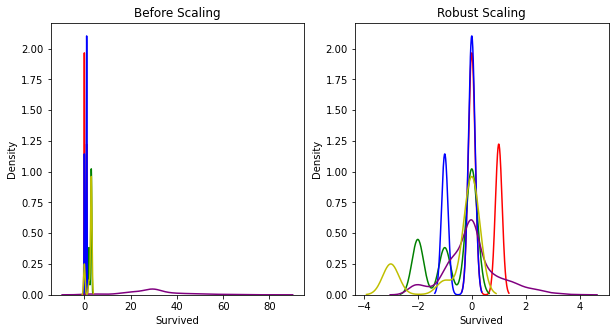

In [31]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(10,5))
ax1.set_title("Before Scaling")
sns.kdeplot(titanic['Survived'],ax=ax1,color='r')
sns.kdeplot(titanic['Pclass'],ax=ax1,color='g')
sns.kdeplot(titanic['Sex'],ax=ax1,color='b')
sns.kdeplot(titanic['Age'],ax=ax1,color='purple')
sns.kdeplot(titanic['Embarked'],ax=ax1,color='y')

ax2.set_title("Robust Scaling")
sns.kdeplot(titanic_df['Survived'],ax=ax2,color='r')
sns.kdeplot(titanic_df['Pclass'],ax=ax2,color='g')
sns.kdeplot(titanic_df['Sex'],ax=ax2,color='b')
sns.kdeplot(titanic_df['Age'],ax=ax2,color='purple')
sns.kdeplot(titanic_df['Embarked'],ax=ax2,color='y')

plt.show()